In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


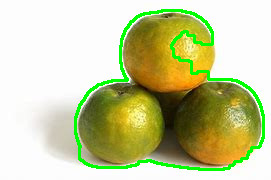

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Read the image
image = cv2.imread('/content/drive/MyDrive/PKM RE 2024/Codingan/jeruk.jpeg')

# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Perform morphological operations
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Find contours
contours, _ = cv2.findContours(sure_bg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours around citrus fruits
for contour in contours:
    cv2.drawContours(image, [contour], 0, (0,255,0), 2)

# Display segmented image
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# pip install scikit-learn==1.5.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 33.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
pip show scikit-learn

Name: scikit-learn
Version: 1.5.0
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick


In [ ]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Load the data from CSV file
df = pd.read_csv('/content/drive/MyDrive/PKM RE 2024/Codingan/jepon flavor.csv')

print(df.columns)

df.head(10)

Index(['Red', 'Green', 'Blue', 'Rasa'], dtype='object')


,Red,Green,Blue,Rasa
0,137,112,74,Manis
1,137,112,74,Manis
2,125,103,65,Manis
3,135,80,28,Manis
4,153,110,24,Manis
5,123,96,23,Manis
6,127,107,40,Manis
7,109,92,72,Manis
8,112,100,44,Manis
9,104,90,42,Manis


In [ ]:
print(df.shape)

(120, 4)


In [ ]:
df.Rasa.value_counts()

Rasa
Asam     41
Manis    40
Tawar    39
Name: count, dtype: int64

In [ ]:
# Split data into features and target variable
X = df[['Red', 'Green', 'Blue']]
y = df['Rasa']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate KNN classifier
knn = KNeighborsClassifier(n_neighbors=11)

# Fit the classifier to the training data
knn.fit(X_train_scaled, y_train)

# Predict the test set results
y_pred = knn.predict(X_test_scaled)

# Save the model to a file
joblib.dump(knn, 'knn_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7916666666666666


In [ ]:
import tkinter as tk
from tkinter import messagebox
import numpy as np
import joblib
import joblib

# Load the trained KNN model and scaler
knn = joblib.load('/content/knn_model.pkl')
scaler = joblib.load('/content/scaler.pkl')

# Function to predict the flavor
def predict_flavor():
    try:
        r = int(entry_r.get())
        g = int(entry_g.get())
        b = int(entry_b.get())

        if not (0 <= r <= 255 and 0 <= g <= 255 and 0 <= b <= 255):
            raise ValueError

        rgb_value = np.array([[r, g, b]])
        rgb_value_scaled = scaler.transform(rgb_value)
        flavor = knn.predict(rgb_value_scaled)[0]

        label_result.config(text=f"Predicted Flavor: {flavor}")
    except ValueError:
        messagebox.showerror("Invalid input", "Please enter valid RGB values (0-255).")

# Create the main window
window = tk.Tk()
window.title("Fruit Flavor Detection")

# Create and place labels and entry widgets for RGB input
tk.Label(window, text="Red (0-255):").grid(row=0, column=0)
entry_r = tk.Entry(window)
entry_r.grid(row=0, column=1)

tk.Label(window, text="Green (0-255):").grid(row=1, column=0)
entry_g = tk.Entry(window)
entry_g.grid(row=1, column=1)

tk.Label(window, text="Blue (0-255):").grid(row=2, column=0)
entry_b = tk.Entry(window)
entry_b.grid(row=2, column=1)

# Create and place a button to trigger the prediction
predict_button = tk.Button(window, text="Predict Flavor", command=predict_flavor)
predict_button.grid(row=3, column=0, columnspan=2)

# Create and place a label to display the prediction result
label_result = tk.Label(window, text="Predicted Flavor: ")
label_result.grid(row=4, column=0, columnspan=2)

# Start the GUI event loop
window.mainloop()

TclError: no display name and no $DISPLAY environment variable

Classification Report:
               precision    recall  f1-score   support

        Asam       0.88      0.70      0.78        10
       Manis       0.88      1.00      0.93         7
       Tawar       0.62      0.71      0.67         7

    accuracy                           0.79        24
   macro avg       0.79      0.80      0.79        24
weighted avg       0.80      0.79      0.79        24



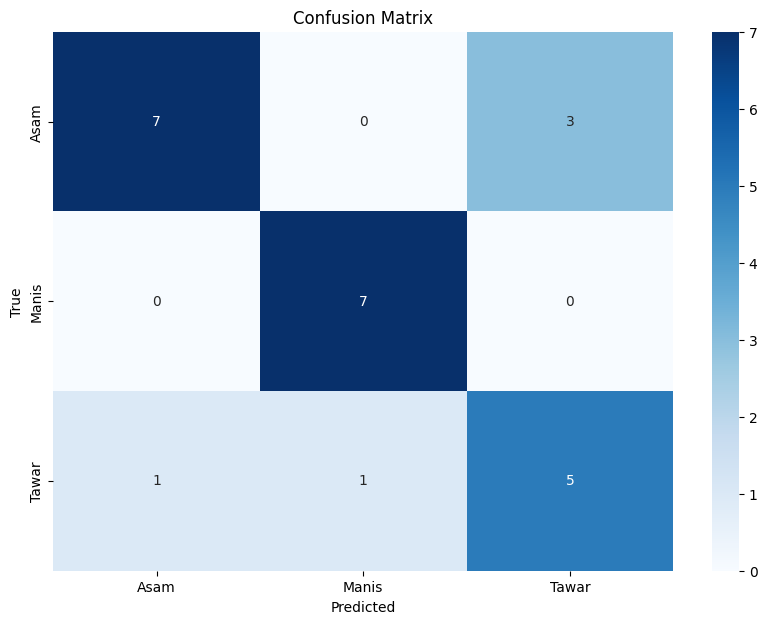

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import pandas as pd
import cv2
import numpy as np

# Function to convert RGB to Lab
def rgb_to_lab(rgb):
    rgb = np.uint8([[rgb]])  # Convert to 8-bit unsigned integer array
    lab = cv2.cvtColor(rgb, cv2.COLOR_RGB2Lab)  # Convert to Lab color space
    return lab[0][0]

# Function to convert RGB to HSV
def rgb_to_hsv(rgb):
    rgb = np.uint8([[rgb]])  # Convert to 8-bit unsigned integer array
    hsv = cv2.cvtColor(rgb, cv2.COLOR_RGB2HSV)  # Convert to HSV color space
    return hsv[0][0]

# Read the CSV file
df = pd.read_csv('/content/drive/MyDrive/PKM RE 2024/Codingan/jepon flavor.csv')

# Initialize columns for Lab and HSV values
df['L'] = np.nan
df['a'] = np.nan
df['b'] = np.nan
df['H'] = np.nan
df['S'] = np.nan
df['V'] = np.nan

# Convert RGB to Lab and HSV
for index, row in df.iterrows():
    rgb = [row['Red'], row['Green'], row['Blue']]

    # Convert to Lab
    lab = rgb_to_lab(rgb)
    df.at[index, 'L'] = lab[0]
    df.at[index, 'a'] = lab[1]
    df.at[index, 'b'] = lab[2]

    # Convert to HSV
    hsv = rgb_to_hsv(rgb)
    df.at[index, 'H'] = hsv[0]
    df.at[index, 'S'] = hsv[1]
    df.at[index, 'V'] = hsv[2]

# Save the updated DataFrame to a new CSV file
df.to_csv('/content/drive/MyDrive/PKM RE 2024/Codingan/citrus_flavor_converted.csv', index=False)

In [ ]:
# Load the data from CSV file
df = pd.read_csv('/content/drive/MyDrive/PKM RE 2024/Codingan/citrus_flavor_converted.csv')

print(df.columns)

df.head(10)

Index(['Red', 'Green', 'Blue', 'Rasa', 'L', 'a', 'b', 'H', 'S', 'V'], dtype='object')


,Red,Green,Blue,Rasa,L,a,b,H,S,V
0,137,112,74,Manis,124.0,132.0,153.0,18.0,117.0,137.0
1,137,112,74,Manis,124.0,132.0,153.0,18.0,117.0,137.0
2,125,103,65,Manis,115.0,131.0,153.0,19.0,122.0,125.0
3,135,80,28,Manis,101.0,147.0,166.0,15.0,202.0,135.0
4,153,110,24,Manis,126.0,137.0,178.0,20.0,215.0,153.0
5,123,96,23,Manis,108.0,131.0,171.0,22.0,207.0,123.0
6,127,107,40,Manis,117.0,128.0,167.0,23.0,175.0,127.0
7,109,92,72,Manis,103.0,131.0,142.0,16.0,87.0,109.0
8,112,100,44,Manis,108.0,125.0,161.0,25.0,155.0,112.0
9,104,90,42,Manis,99.0,127.0,157.0,23.0,152.0,104.0


In [ ]:
# Split data into features and target variable
X = df[['L', 'a', 'b']]
y = df['Rasa']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate KNN classifier
knn = KNeighborsClassifier(n_neighbors=11)

# Fit the classifier to the training data
knn.fit(X_train_scaled, y_train)

# Predict the test set results
y_pred = knn.predict(X_test_scaled)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7083333333333334


Classification Report:
               precision    recall  f1-score   support

        Asam       0.67      0.60      0.63        10
       Manis       0.86      0.86      0.86         7
       Tawar       0.62      0.71      0.67         7

    accuracy                           0.71        24
   macro avg       0.72      0.72      0.72        24
weighted avg       0.71      0.71      0.71        24



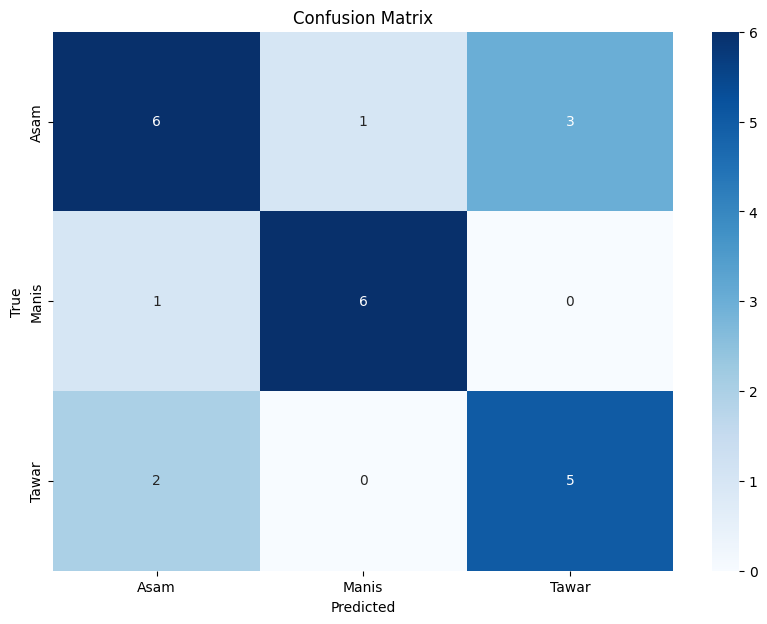

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Split data into features and target variable
X = df[['H', 'S', 'V']]
y = df['Rasa']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate KNN classifier
knn = KNeighborsClassifier(n_neighbors=11)

# Fit the classifier to the training data
knn.fit(X_train_scaled, y_train)

# Predict the test set results
y_pred = knn.predict(X_test_scaled)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8333333333333334


Classification Report:
               precision    recall  f1-score   support

        Asam       0.88      0.70      0.78        10
       Manis       1.00      1.00      1.00         7
       Tawar       0.67      0.86      0.75         7

    accuracy                           0.83        24
   macro avg       0.85      0.85      0.84        24
weighted avg       0.85      0.83      0.83        24



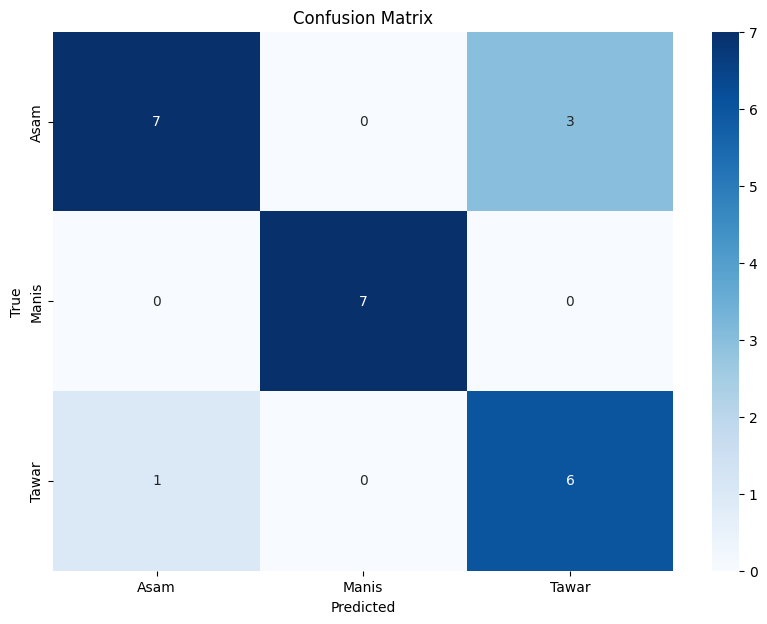

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import pandas as pd
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Function to convert RGB to Lab
def rgb_to_lab(rgb):
    rgb = np.uint8([[rgb]])
    lab = cv2.cvtColor(rgb, cv2.COLOR_RGB2Lab)
    return lab[0][0]

# Function to convert RGB to HSV
def rgb_to_hsv(rgb):
    rgb = np.uint8([[rgb]])
    hsv = cv2.cvtColor(rgb, cv2.COLOR_RGB2HSV)
    return hsv[0][0]

# Read the CSV file
df = pd.read_csv('/content/drive/MyDrive/PKM RE 2024/Codingan/jepon flavor.csv')

# Prepare RGB features
X_rgb = df[['Red', 'Green', 'Blue']]
y = df['Rasa']

# Convert RGB to Lab and HSV
lab_data = X_rgb.apply(lambda row: rgb_to_lab([row['Red'], row['Green'], row['Blue']]), axis=1, result_type='expand')
lab_data.columns = ['L', 'a', 'b']

hsv_data = X_rgb.apply(lambda row: rgb_to_hsv([row['Red'], row['Green'], row['Blue']]), axis=1, result_type='expand')
hsv_data.columns = ['H', 'S', 'V']

# Define a function to train and evaluate KNN model
def evaluate_knn(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    knn = KNeighborsClassifier(n_neighbors=11)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    return accuracy_score(y_test, y_pred)

# Evaluate KNN with RGB features
accuracy_rgb = evaluate_knn(X_rgb, y)
print("RGB Accuracy:", accuracy_rgb)

# Evaluate KNN with Lab features
accuracy_lab = evaluate_knn(lab_data, y)
print("Lab Accuracy:", accuracy_lab)

# Evaluate KNN with HSV features
accuracy_hsv = evaluate_knn(hsv_data, y)
print("HSV Accuracy:", accuracy_hsv)

RGB Accuracy: 0.7916666666666666
Lab Accuracy: 0.7083333333333334
HSV Accuracy: 0.8333333333333334


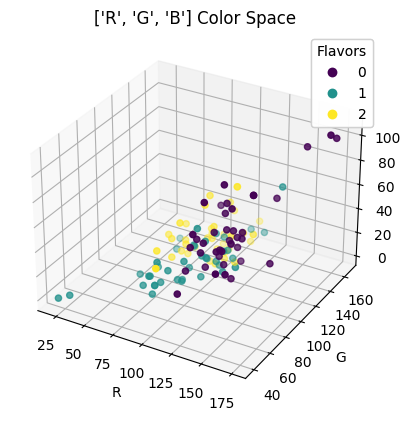

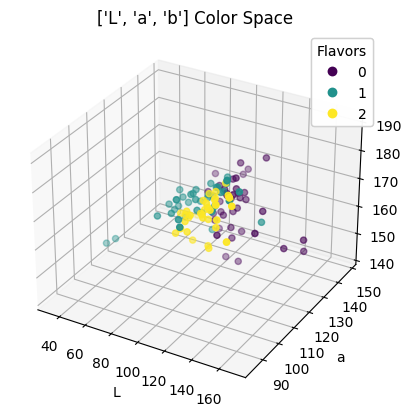

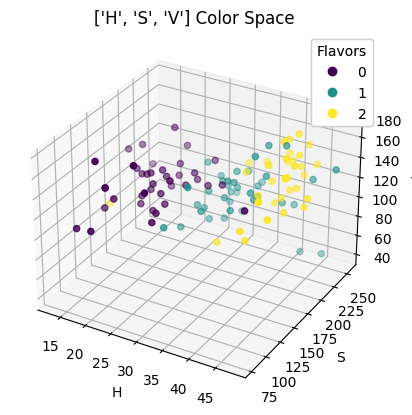

In [ ]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Function to create a 3D scatter plot
def create_scatter_plot(data, labels, color_space):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(data.iloc[:, 0], data.iloc[:, 1], data.iloc[:, 2], c=pd.factorize(labels)[0], cmap='viridis')
    ax.set_xlabel(color_space[0])
    ax.set_ylabel(color_space[1])
    ax.set_zlabel(color_space[2])
    ax.set_title(f'{color_space} Color Space')
    legend = ax.legend(*scatter.legend_elements(), title="Flavors")
    ax.add_artist(legend)
    plt.show()

# Plot RGB color space
create_scatter_plot(X_rgb, y, ['R', 'G', 'B'])

# Plot Lab color space
create_scatter_plot(lab_data, y, ['L', 'a', 'b'])

# Plot HSV color space
create_scatter_plot(hsv_data, y, ['H', 'S', 'V'])